# Problem Set 2 - MANOVA

Goal: Students will use R to conduct a Multivariate Analysis of Variance (MANOVA)

Background: An investigator is interested in determining if several outcome measures are differently influenced by sex, being a veteran, and rural residence. They have outcome data related to Adverse Childhood Experience (ACES), BMI, and self-reports of the number of poor physical health days in the last month, which they believe are correlated with each other, and therefore, they would be similarly influenced by sex, veteran status, and location of residence. They want to find out if ACES, BMI, and poor health days, as a group of characteristics are different among different groups (i.e., sex, veteran, and residence), and if interactions of these groups influence these characteristics. You’ve decided to tun a MANOVA to answer these questions

---

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(comprehenr))

Warning message:
"package 'comprehenr' was built under R version 4.2.3"


In [108]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements - 2019 BRFSS R Data File.csv")

In [109]:
# recoding missing values
df$VETERAN[df$VETERAN == 7] <- NA
df$VETERAN[df$VETERAN == 9] <- NA

---

## 1: Describe how the data for this project meets/or does not meet the following assumptions

- *Two or more dependent variables*

Dependent variables: ACES, BMI, and poor health days

- *At least one independent variable with two or more levels*

Independent variables: sex (2 levels), veteran (2 levels), and residence (2 levels)

- *Adequate sample size*

- *No outliers in dependent variables*

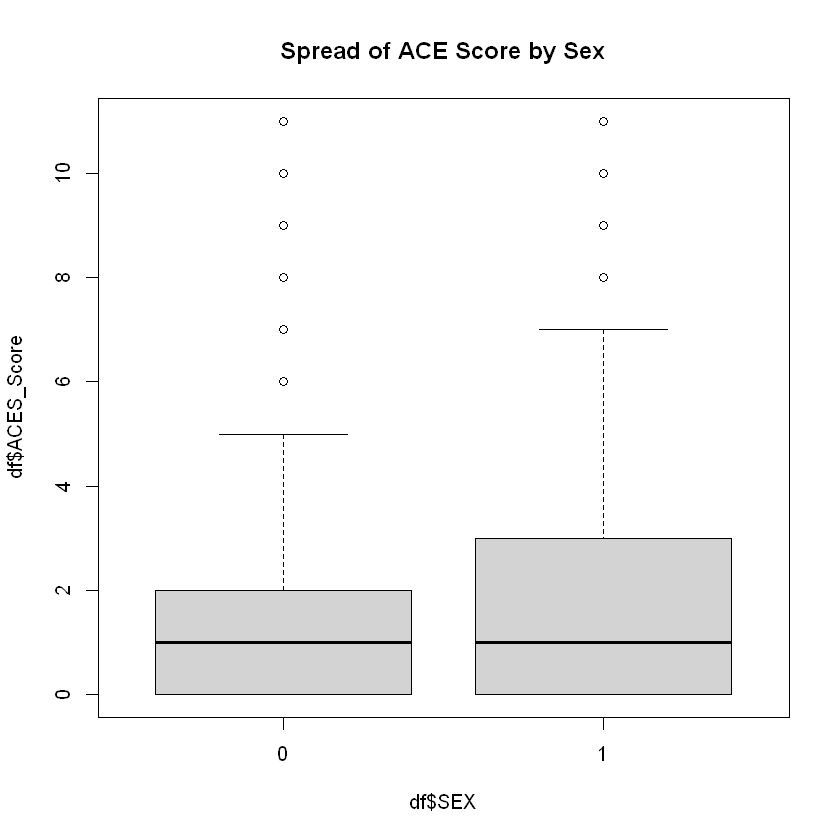

In [110]:
boxplot(df$ACES_Score ~ df$SEX, main='Spread of ACE Score by Sex')


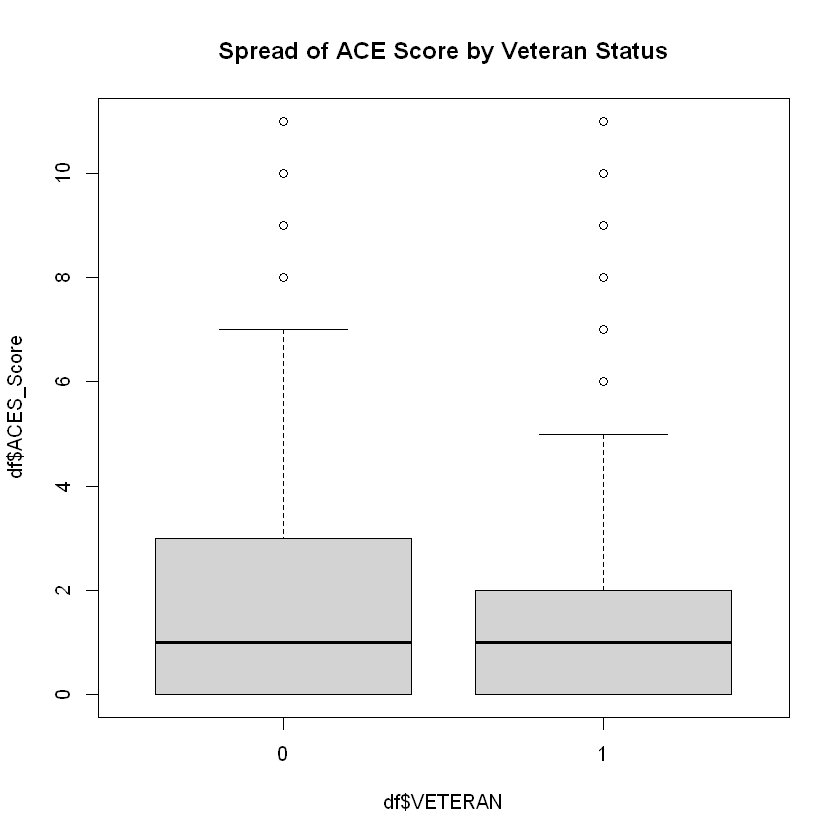

In [111]:
boxplot(df$ACES_Score ~ df$VETERAN, main='Spread of ACE Score by Veteran Status')


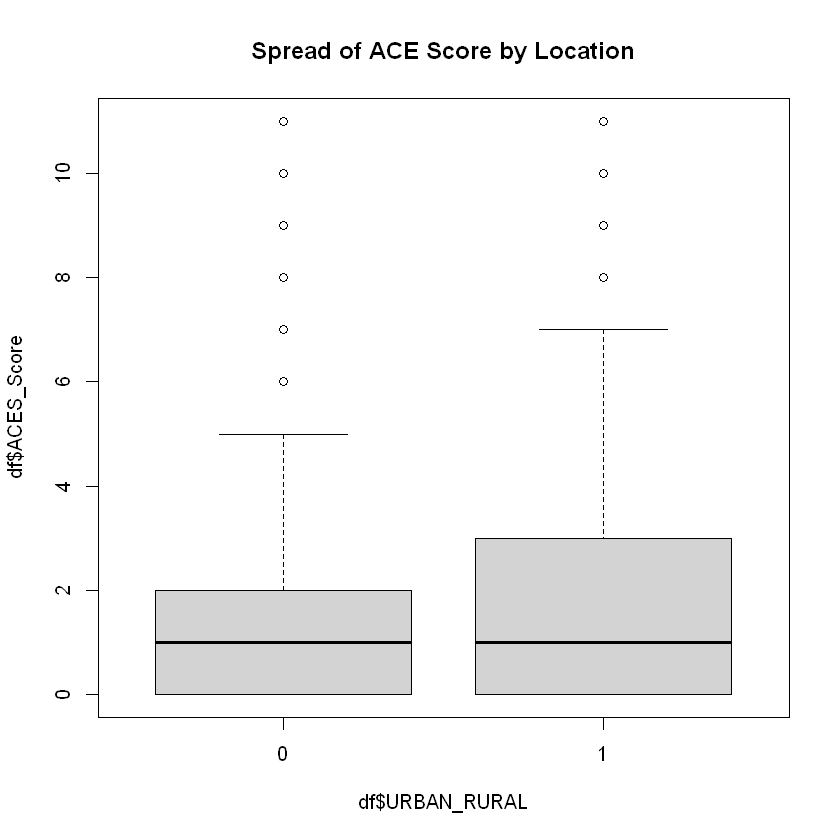

In [112]:
boxplot(df$ACES_Score ~ df$URBAN_RURAL, main='Spread of ACE Score by Location')


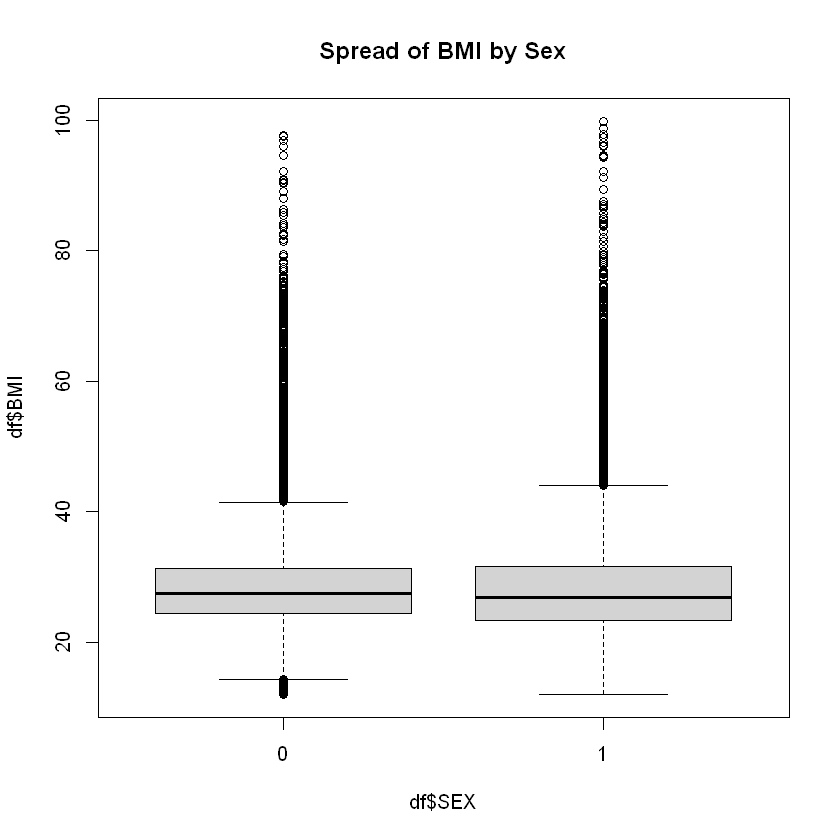

In [113]:
boxplot(df$BMI ~ df$SEX, main='Spread of BMI by Sex')

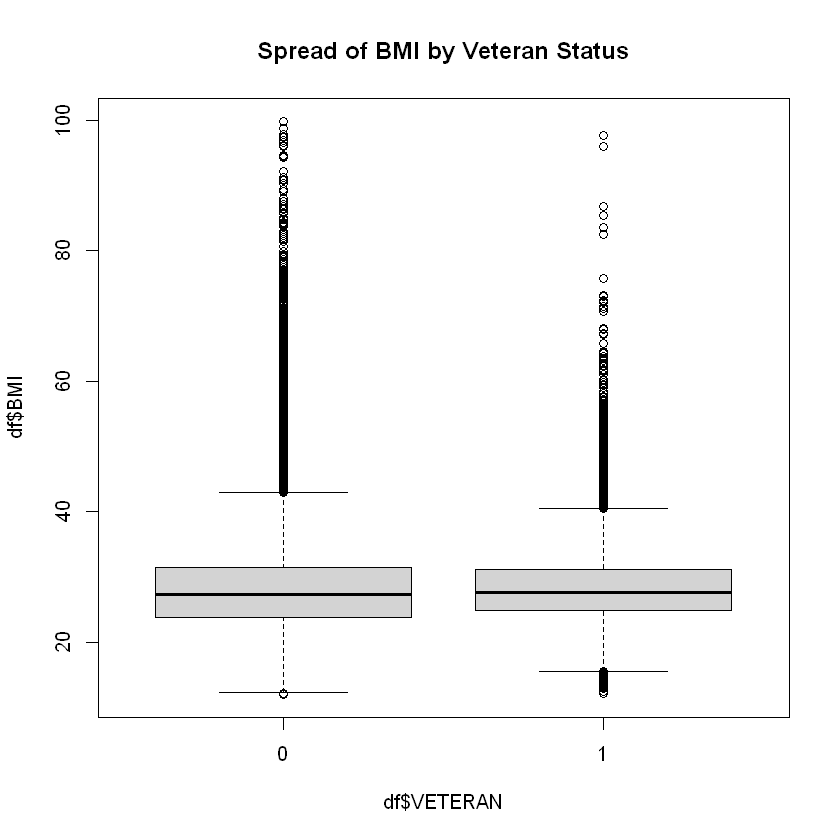

In [114]:
boxplot(df$BMI ~ df$VETERAN, main='Spread of BMI by Veteran Status')

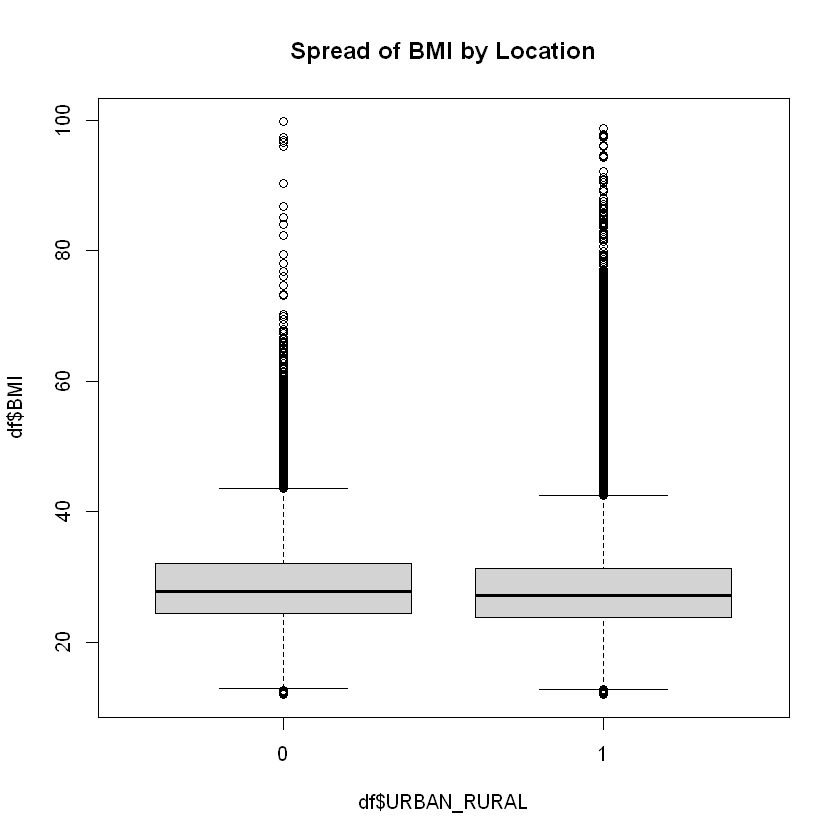

In [115]:
boxplot(df$BMI ~ df$URBAN_RURAL, main='Spread of BMI by Location')

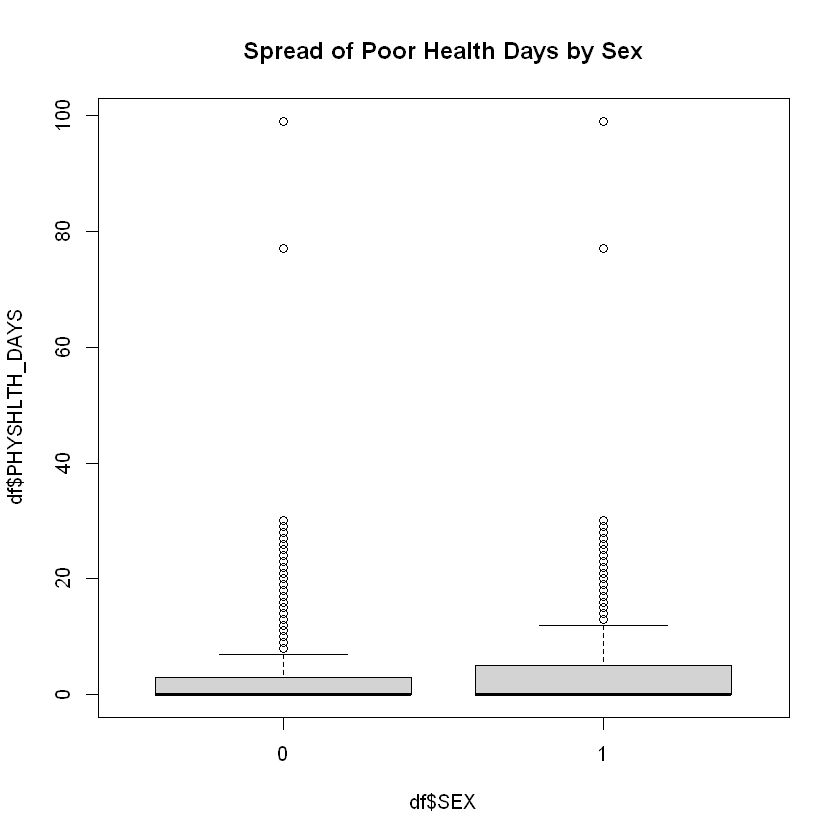

In [116]:
 boxplot(df$PHYSHLTH_DAYS ~ df$SEX, main='Spread of Poor Health Days by Sex')

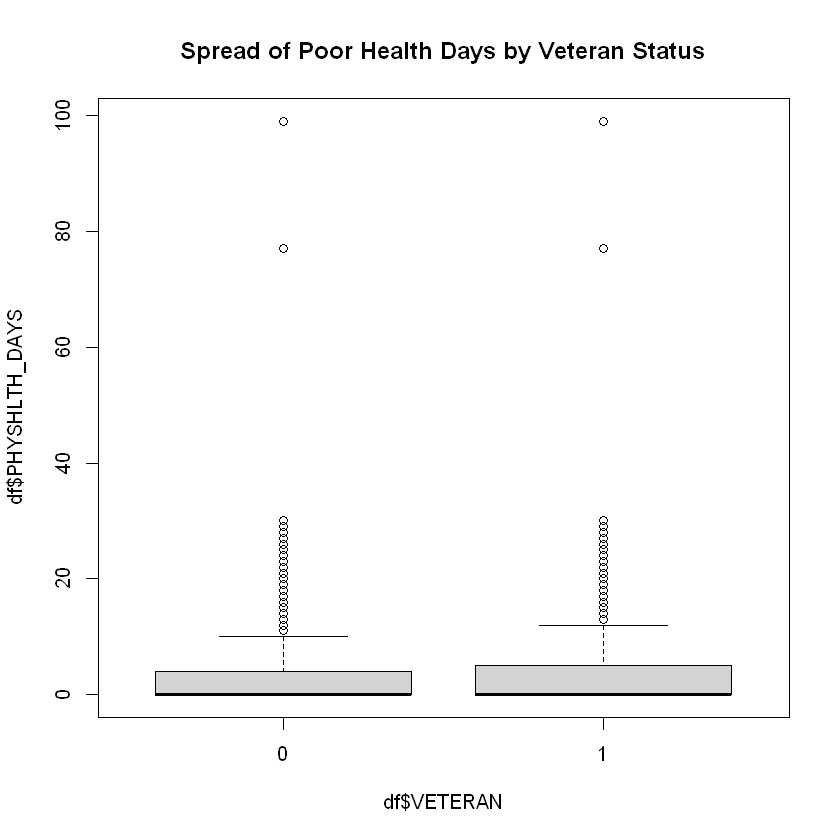

In [117]:
boxplot(df$PHYSHLTH_DAYS ~ df$VETERAN, main='Spread of Poor Health Days by Veteran Status')

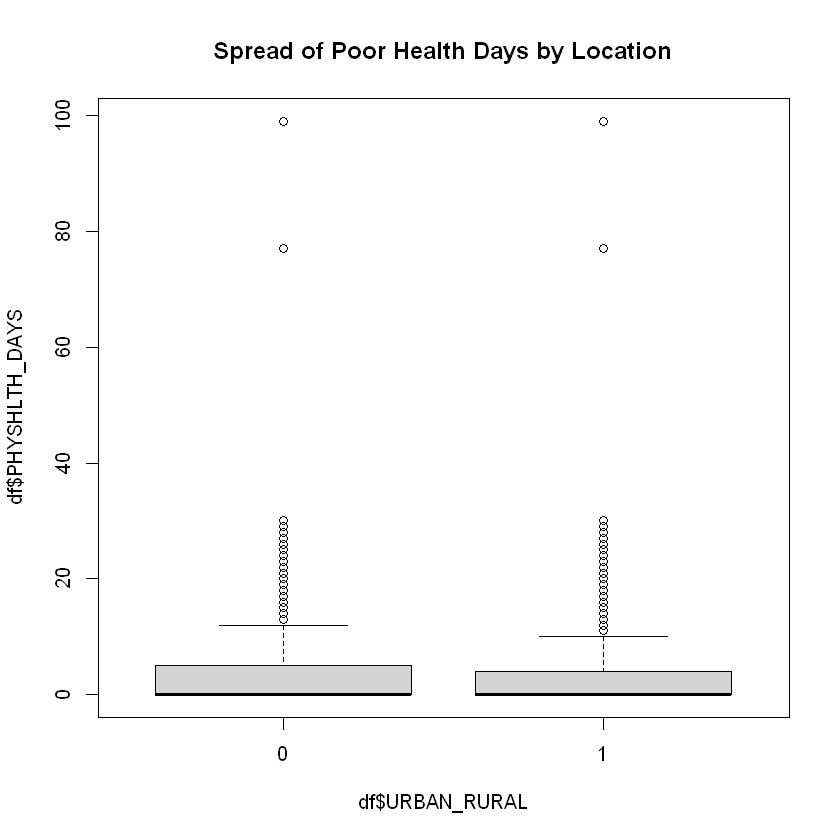

In [118]:
boxplot(df$PHYSHLTH_DAYS ~ df$URBAN_RURAL, main='Spread of Poor Health Days by Location')

Each view of the spread of the dependent variables shows significant outliers. 

- *Multivariate normality*

In [119]:
# Replacing NA with variable means
# This method overwrites the original dataframe - remember this for later analyses
# Might need to reload the dataframe later on

df$PHYSHLTH_DAYS[is.na(df$PHYSHLTH_DAYS)] <- mean(df$PHYSHLTH_DAYS, na.rm=T)
df$BMI[is.na(df$BMI)] <- mean(df$BMI, na.rm=T)
df$URBAN_RURAL[is.na(df$URBAN_RURAL)] <- mean(df$URBAN_RURAL, na.rm=T)
df$ACES_Score[is.na(df$ACES_Score)] <- mean(df$ACES_Score, na.rm=T)
df$SEX[is.na(df$SEX)] <- mean(df$SEX, na.rm=T)
df$VETERAN[is.na(df$VETERAN)] <- mean(df$VETERAN, na.rm=T)

In [16]:
ks_healthdays <- ks.test(df$PHYSHLTH_DAYS, 'pnorm',mean(df$PHYSHLTH_DAYS),sd(df$PHYSHLTH_DAYS))
ks_bmi <- ks.test(df$BMI, 'pnorm',mean(df$BMI),sd(df$BMI))
ks_loc <- ks.test(df$URBAN_RURAL, 'pnorm',mean(df$URBAN_RURAL),sd(df$URBAN_RURAL))

Warning message in ks.test.default(df$PHYSHLTH_DAYS, "pnorm", mean(df$PHYSHLTH_DAYS), :
"ties should not be present for the Kolmogorov-Smirnov test"
Warning message in ks.test.default(df$BMI, "pnorm", mean(df$BMI), sd(df$BMI)):
"ties should not be present for the Kolmogorov-Smirnov test"


Warning message in ks.test.default(df$URBAN_RURAL, "pnorm", mean(df$URBAN_RURAL), :
"ties should not be present for the Kolmogorov-Smirnov test"


In [17]:
ks_healthdays


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$PHYSHLTH_DAYS
D = 0.33295, p-value < 2.2e-16
alternative hypothesis: two-sided


In [18]:
ks_bmi


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$BMI
D = 0.11948, p-value < 2.2e-16
alternative hypothesis: two-sided


In [19]:
ks_loc


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$URBAN_RURAL
D = 0.49594, p-value < 2.2e-16
alternative hypothesis: two-sided


In [21]:
# ACEs Score KS Test
ks.test(df$ACES_Score, 'pnorm',mean(df$ACES_Score),sd(df$ACES_Score))

Warning message in ks.test.default(df$ACES_Score, "pnorm", mean(df$ACES_Score), :
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$ACES_Score
D = 0.41052, p-value < 2.2e-16
alternative hypothesis: two-sided


In [22]:
# Sex KS Test
ks.test(df$SEX, 'pnorm',mean(df$SEX),sd(df$SEX))

Warning message in ks.test.default(df$SEX, "pnorm", mean(df$SEX), sd(df$SEX)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$SEX
D = 0.36514, p-value < 2.2e-16
alternative hypothesis: two-sided


In [23]:
# Veteran Status KS Test
ks.test(df$VETERAN, 'pnorm',mean(df$VETERAN),sd(df$VETERAN))

Warning message in ks.test.default(df$VETERAN, "pnorm", mean(df$VETERAN), sd(df$VETERAN)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$VETERAN
D = 0.5166, p-value < 2.2e-16
alternative hypothesis: two-sided


- *Homogeneity of variance-covariances*

- *No multicollinearity between dependent variables*

In [24]:
cor.test(df$BMI, df$PHYSHLTH_DAYS)


	Pearson's product-moment correlation

data:  df$BMI and df$PHYSHLTH_DAYS
t = 45.096, df = 418266, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06654328 0.07257504
sample estimates:
      cor 
0.0695598 


In [26]:
cor.test(df$URBAN_RURAL, df$PHYSHLTH_DAYS)


	Pearson's product-moment correlation

data:  df$URBAN_RURAL and df$PHYSHLTH_DAYS
t = -14.894, df = 418266, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02605255 -0.01999467
sample estimates:
        cor 
-0.02302382 


In [27]:
cor.test(df$BMI, df$URBAN_RURAL)


	Pearson's product-moment correlation

data:  df$BMI and df$URBAN_RURAL
t = -18.612, df = 418266, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03179376 -0.02573768
sample estimates:
        cor 
-0.02876598 


In [28]:
cor.test(df$ACES_Score, df$URBAN_RURAL)


	Pearson's product-moment correlation

data:  df$ACES_Score and df$URBAN_RURAL
t = 13.295, df = 418266, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01752267 0.02358121
sample estimates:
       cor 
0.02055213 


In [29]:
cor.test(df$ACES_Score, df$BMI)


	Pearson's product-moment correlation

data:  df$ACES_Score and df$BMI
t = 24.674, df = 418266, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03509794 0.04115022
sample estimates:
       cor 
0.03812443 


With significant p-values for each correlation test, the 'no multicollinearity' assumption is violated.

---

## 2: Based on your evaluation of the assumptions testing, is MANOVA an appropriate test in this situation? Explain.

---

## 3: Run the MANOVA using sex (Male reference), veteran status (Not a veteran reference), and urban/rural location (rural reference) as the independent variables, and ACES, BMI, and number of poor physical health days as the dependent variables. Interpret the output for each of the following tables

In [89]:
suppressPackageStartupMessages(library(MASS))
suppressPackageStartupMessages(library(multiUS))

- *Box's Test of Equality of Covariance Matrices*

In [123]:
BoxMTest(X = cbind(df$ACES_Score, df$BMI, df$PHYSHLTH_DAYS), cl = as.factor(df$SEX))


------------------------------------------------
      MBox    Chi-sqr          df            P
------------------------------------------------
11569.1832 11569.0923           6       0.0000
------------------------------------------------
Covariance matrices are significantly different.


In [124]:
BoxMTest(X = cbind(df$ACES_Score, df$BMI, df$PHYSHLTH_DAYS), cl = as.factor(df$URBAN_RURAL))


------------------------------------------------
      MBox    Chi-sqr          df            P
------------------------------------------------
       Inf        Inf          12       0.0000
------------------------------------------------
Covariance matrices are significantly different.


In [125]:
BoxMTest(X = cbind(df$ACES_Score, df$BMI, df$PHYSHLTH_DAYS), cl = as.factor(df$VETERAN))


------------------------------------------------
      MBox    Chi-sqr          df            P
------------------------------------------------
 6278.7346  6277.2512          12       0.0000
------------------------------------------------
Covariance matrices are significantly different.


In [126]:
BoxMTest(X = cbind(df$ACES_Score, df$BMI, df$PHYSHLTH_DAYS), cl = as.factor(df$VETERAN* df$URBAN_RURAL* df$SEX))


------------------------------------------------
      MBox    Chi-sqr          df            P
------------------------------------------------
       Inf        Inf          24       0.0000
------------------------------------------------
Covariance matrices are significantly different.


The dependent variables failed the 'Equality of Covariances' assumption.

- *Multivariate Tests*

In [127]:
model <-manova(cbind(df$ACES_Score, df$BMI, df$PHYSHLTH_DAYS) ~ df$SEX * df$URBAN_RURAL * df$VETERAN)

In [128]:
summary(model, 'Pillai')

                                     Df     Pillai approx F num Df den Df
df$SEX                                1 0.00243326   340.07      3 418258
df$URBAN_RURAL                        1 0.00177900   248.47      3 418258
df$VETERAN                            1 0.00110954   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1 0.00002551     3.56      3 418258
df$SEX:df$VETERAN                     1 0.00052273    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1 0.00010940    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1 0.00000843     1.18      3 418258
Residuals                        418260                                  
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 ***
df$URBAN_RURAL:df$VETERAN        6.379e-10 ***
df$SE

In [129]:
summary(model,'Wilks')

                                     Df   Wilks approx F num Df den Df
df$SEX                                1 0.99757   340.07      3 418258
df$URBAN_RURAL                        1 0.99822   248.47      3 418258
df$VETERAN                            1 0.99889   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1 0.99997     3.56      3 418258
df$SEX:df$VETERAN                     1 0.99948    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1 0.99989    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1 0.99999     1.18      3 418258
Residuals                        418260                               
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 ***
df$URBAN_RURAL:df$VETERAN        6.379e-10 ***
df$SEX:df$URBAN_RURAL:df$VETERAN

In [130]:
summary(model, 'Roy')

                                     Df        Roy approx F num Df den Df
df$SEX                                1 0.00243920   340.07      3 418258
df$URBAN_RURAL                        1 0.00178217   248.47      3 418258
df$VETERAN                            1 0.00111077   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1 0.00002551     3.56      3 418258
df$SEX:df$VETERAN                     1 0.00052300    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1 0.00010941    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1 0.00000843     1.18      3 418258
Residuals                        418260                                  
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 ***
df$URBAN_RURAL:df$VETERAN        6.379e-10 ***
df$SE

In [131]:
summary(model, 'Hotelling-Lawley')

                                     Df Hotelling-Lawley approx F num Df den Df
df$SEX                                1       0.00243920   340.07      3 418258
df$URBAN_RURAL                        1       0.00178217   248.47      3 418258
df$VETERAN                            1       0.00111077   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1       0.00002551     3.56      3 418258
df$SEX:df$VETERAN                     1       0.00052300    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1       0.00010941    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1       0.00000843     1.18      3 418258
Residuals                        418260                                        
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 **

Results are congruent among each of the four test statistics. Each individual independent variable had statistically significant impact on outcomes, and similarly, each linear combination of independent variables had significant impacts on outcomes; except for the combination of all three variables. 

---

## 4: Select a random sample of approximately 400 cases, redo the MANOVA (not the assumptions tests) of the analyses above. Compare and contrast the same tables/questions from #2. Also comment on the impact of sample size on your results. Why does this matter?

In [91]:
sdf <- df[sample(nrow(df), size=400), ]

In [92]:
summary(sdf)

   Subject_ID          ACES_Score          BMI        PHYSHLTH_DAYS   
 Min.   :2.019e+09   Min.   : 0.000   Min.   :16.46   Min.   : 0.000  
 1st Qu.:2.019e+09   1st Qu.: 1.703   1st Qu.:24.69   1st Qu.: 0.000  
 Median :2.019e+09   Median : 1.703   Median :28.06   Median : 0.000  
 Mean   :2.019e+09   Mean   : 1.702   Mean   :28.73   Mean   : 6.112  
 3rd Qu.:2.019e+09   3rd Qu.: 1.703   3rd Qu.:32.09   3rd Qu.: 4.000  
 Max.   :2.019e+09   Max.   :10.000   Max.   :55.36   Max.   :99.000  
      SEX        URBAN_RURAL        VETERAN      
 Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :1.00   Median :1.0000   Median :0.0000  
 Mean   :0.57   Mean   :0.8421   Mean   :0.1356  
 3rd Qu.:1.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.00   Max.   :1.0000   Max.   :1.0000  

In [102]:
smodel <-manova(
                cbind(sdf$ACES_Score, sdf$BMI, sdf$PHYSHLTH_DAYS) ~ 
                sdf$SEX * sdf$URBAN_RURAL * sdf$VETERAN
                )
smodel

Call:
   manova(cbind(sdf$ACES_Score, sdf$BMI, sdf$PHYSHLTH_DAYS) ~ sdf$SEX * 
    sdf$URBAN_RURAL * sdf$VETERAN)

Terms:
                 sdf$SEX sdf$URBAN_RURAL sdf$VETERAN sdf$SEX:sdf$URBAN_RURAL
resp 1              0.02            1.30        1.12                    3.79
resp 2             80.86          160.45       26.80                    1.73
resp 3            519.36          153.90      123.36                  371.52
Deg. of Freedom        1               1           1                       1
                sdf$SEX:sdf$VETERAN sdf$URBAN_RURAL:sdf$VETERAN Residuals
resp 1                         0.18                        0.02    455.81
resp 2                       597.80                       57.02  15578.82
resp 3                       109.51                      588.67  75071.61
Deg. of Freedom                   1                           1       393

Residual standard errors: 1.076951 6.296092 13.82107
1 out of 8 effects not estimable
Estimated effects may be unbalanced

In [136]:
summary(model, 'Pillai')
summary(smodel, 'Pillai')


                                     Df     Pillai approx F num Df den Df
df$SEX                                1 0.00243326   340.07      3 418258
df$URBAN_RURAL                        1 0.00177900   248.47      3 418258
df$VETERAN                            1 0.00110954   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1 0.00002551     3.56      3 418258
df$SEX:df$VETERAN                     1 0.00052273    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1 0.00010940    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1 0.00000843     1.18      3 418258
Residuals                        418260                                  
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 ***
df$URBAN_RURAL:df$VETERAN        6.379e-10 ***
df$SE

                             Df   Pillai approx F num Df den Df    Pr(>F)    
sdf$SEX                       1 0.010441   1.3751      3    391 0.2499243    
sdf$URBAN_RURAL               1 0.014077   1.8609      3    391 0.1356684    
sdf$VETERAN                   1 0.006353   0.8333      3    391 0.4761533    
sdf$SEX:sdf$URBAN_RURAL       1 0.013754   1.8176      3    391 0.1433855    
sdf$SEX:sdf$VETERAN           1 0.041730   5.6756      3    391 0.0008193 ***
sdf$URBAN_RURAL:sdf$VETERAN   1 0.010093   1.3288      3    391 0.2645718    
Residuals                   393                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [133]:
summary(model,'Wilks')
summary(smodel,'Wilks')


                                     Df   Wilks approx F num Df den Df
df$SEX                                1 0.99757   340.07      3 418258
df$URBAN_RURAL                        1 0.99822   248.47      3 418258
df$VETERAN                            1 0.99889   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1 0.99997     3.56      3 418258
df$SEX:df$VETERAN                     1 0.99948    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1 0.99989    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1 0.99999     1.18      3 418258
Residuals                        418260                               
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 ***
df$URBAN_RURAL:df$VETERAN        6.379e-10 ***
df$SEX:df$URBAN_RURAL:df$VETERAN

                             Df   Wilks approx F num Df den Df    Pr(>F)    
sdf$SEX                       1 0.98956   1.3751      3    391 0.2499243    
sdf$URBAN_RURAL               1 0.98592   1.8609      3    391 0.1356684    
sdf$VETERAN                   1 0.99365   0.8333      3    391 0.4761533    
sdf$SEX:sdf$URBAN_RURAL       1 0.98625   1.8176      3    391 0.1433855    
sdf$SEX:sdf$VETERAN           1 0.95827   5.6756      3    391 0.0008193 ***
sdf$URBAN_RURAL:sdf$VETERAN   1 0.98991   1.3288      3    391 0.2645718    
Residuals                   393                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [134]:
summary(model, 'Roy')
summary(smodel, 'Roy')


                                     Df        Roy approx F num Df den Df
df$SEX                                1 0.00243920   340.07      3 418258
df$URBAN_RURAL                        1 0.00178217   248.47      3 418258
df$VETERAN                            1 0.00111077   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1 0.00002551     3.56      3 418258
df$SEX:df$VETERAN                     1 0.00052300    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1 0.00010941    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1 0.00000843     1.18      3 418258
Residuals                        418260                                  
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 ***
df$URBAN_RURAL:df$VETERAN        6.379e-10 ***
df$SE

                             Df      Roy approx F num Df den Df    Pr(>F)    
sdf$SEX                       1 0.010551   1.3751      3    391 0.2499243    
sdf$URBAN_RURAL               1 0.014278   1.8609      3    391 0.1356684    
sdf$VETERAN                   1 0.006394   0.8333      3    391 0.4761533    
sdf$SEX:sdf$URBAN_RURAL       1 0.013945   1.8176      3    391 0.1433855    
sdf$SEX:sdf$VETERAN           1 0.043547   5.6756      3    391 0.0008193 ***
sdf$URBAN_RURAL:sdf$VETERAN   1 0.010196   1.3288      3    391 0.2645718    
Residuals                   393                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [135]:
summary(model, 'Hotelling-Lawley')
summary(smodel, 'Hotelling-Lawley')

                                     Df Hotelling-Lawley approx F num Df den Df
df$SEX                                1       0.00243920   340.07      3 418258
df$URBAN_RURAL                        1       0.00178217   248.47      3 418258
df$VETERAN                            1       0.00111077   154.86      3 418258
df$SEX:df$URBAN_RURAL                 1       0.00002551     3.56      3 418258
df$SEX:df$VETERAN                     1       0.00052300    72.92      3 418258
df$URBAN_RURAL:df$VETERAN             1       0.00010941    15.25      3 418258
df$SEX:df$URBAN_RURAL:df$VETERAN      1       0.00000843     1.18      3 418258
Residuals                        418260                                        
                                    Pr(>F)    
df$SEX                           < 2.2e-16 ***
df$URBAN_RURAL                   < 2.2e-16 ***
df$VETERAN                       < 2.2e-16 ***
df$SEX:df$URBAN_RURAL              0.01365 *  
df$SEX:df$VETERAN                < 2.2e-16 **

                             Df Hotelling-Lawley approx F num Df den Df
sdf$SEX                       1         0.010551   1.3751      3    391
sdf$URBAN_RURAL               1         0.014278   1.8609      3    391
sdf$VETERAN                   1         0.006394   0.8333      3    391
sdf$SEX:sdf$URBAN_RURAL       1         0.013945   1.8176      3    391
sdf$SEX:sdf$VETERAN           1         0.043547   5.6756      3    391
sdf$URBAN_RURAL:sdf$VETERAN   1         0.010196   1.3288      3    391
Residuals                   393                                        
                               Pr(>F)    
sdf$SEX                     0.2499243    
sdf$URBAN_RURAL             0.1356684    
sdf$VETERAN                 0.4761533    
sdf$SEX:sdf$URBAN_RURAL     0.1433855    
sdf$SEX:sdf$VETERAN         0.0008193 ***
sdf$URBAN_RURAL:sdf$VETERAN 0.2645718    
Residuals                                
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---

5: The data in this assignment has been modified from the original BRFSS data in order to highlight some issues over others. In the original PRFSS, the codebook presents information about how data about sex and sexual orientation and gender identity are asked of participants. See information from the tables below. Thinking about these from a data equity perspective, reflect on the ways these questions are asked, the responses that are available, and how this may or may not present consequences for processing, analyzing, interpreting, and reporting results using this data.

![Alt text](image-1.png)
![Alt text](image-2.png)